In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
train['SalePrice'] = pd.qcut(train['SalePrice'], 3, labels=["Low", "Mid", "High"])

In [6]:
size_mapping = {
    'Low': 0,    
    'Mid': 1, 
    'High': 2    
}
train['SalePrice'] = train['SalePrice'].map(size_mapping)

In [7]:
train[['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,GarageFinish
0,Gd,Gd,No,GLQ,RFn
1,TA,Gd,Gd,ALQ,RFn
2,Gd,Gd,Mn,GLQ,RFn
3,TA,TA,No,ALQ,Unf
4,Gd,Gd,Av,GLQ,RFn


In [8]:
X = train.drop(columns=["SalePrice"])

In [9]:
X.drop(columns=["Id"],inplace=True)

In [10]:
y = train["SalePrice"]

In [11]:
X.fillna(0, inplace=True) 
X = pd.get_dummies(X)


In [12]:
X = np.array(X)
y = np.array(y)

# Modelo 1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [14]:
from keras.layers import Dropout, BatchNormalization, Dense, Activation
from keras.models import Sequential
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.4137 - loss: 1.7015 - val_accuracy: 0.5214 - val_loss: 0.9612
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5947 - loss: 1.1174 - val_accuracy: 0.5983 - val_loss: 0.8811
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6581 - loss: 0.8961 - val_accuracy: 0.6111 - val_loss: 0.8413
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6960 - loss: 0.8511 - val_accuracy: 0.6154 - val_loss: 0.8239
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6965 - loss: 0.7689 - val_accuracy: 0.6068 - val_loss: 0.8006
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7384 - loss: 0.6888 - val_accuracy: 0.6154 - val_loss: 0.7708
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7709 - loss: 0.6063 - val_accuracy: 0.6197 - val_loss: 0.7384
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7312 - loss: 0.6634 - val_accuracy: 0.6325 - val_loss:

Epoch 52/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9496 - loss: 0.1266 - val_accuracy: 0.8120 - val_loss: 0.6117
Epoch 53/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9399 - loss: 0.1437 - val_accuracy: 0.8120 - val_loss: 0.5931
Epoch 54/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9430 - loss: 0.1369 - val_accuracy: 0.8034 - val_loss: 0.6042
Epoch 55/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9528 - loss: 0.1256 - val_accuracy: 0.7821 - val_loss: 0.6498
Epoch 56/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9580 - loss: 0.1128 - val_accuracy: 0.7735 - val_loss: 0.6839
Epoch 57/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9508 - loss: 0.1231 - val_accuracy: 0.7650 - val_loss: 0.7091
Epoch 58/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9558 - loss: 0.1075 - val_accuracy: 0.7692 - val_loss: 0.7208
Epoch 59/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9586 - loss: 0.1276 - val_accuracy: 0.7607 - v

Epoch 103/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9753 - loss: 0.0690 - val_accuracy: 0.7735 - val_loss: 1.0490
Epoch 104/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9814 - loss: 0.0476 - val_accuracy: 0.7735 - val_loss: 1.0693
Epoch 105/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9680 - loss: 0.0923 - val_accuracy: 0.7991 - val_loss: 0.9988
Epoch 106/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9562 - loss: 0.1128 - val_accuracy: 0.7735 - val_loss: 1.0867
Epoch 107/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9671 - loss: 0.0720 - val_accuracy: 0.7692 - val_loss: 1.0931
Epoch 108/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9683 - loss: 0.0894 - val_accuracy: 0.7991 - val_loss: 0.8993
Epoch 109/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9779 - loss: 0.0637 - val_accuracy: 0.8034 - val_loss: 0.9181
Epoch 110/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9802 - loss: 0.0518 - val_accuracy: 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9647 - loss: 0.1005 - val_accuracy: 0.7821 - val_loss: 1.0902
Epoch 154/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9794 - loss: 0.0538 - val_accuracy: 0.7692 - val_loss: 1.1538
Epoch 155/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9703 - loss: 0.0744 - val_accuracy: 0.7650 - val_loss: 1.2723
Epoch 156/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9806 - loss: 0.0479 - val_accuracy: 0.7735 - val_loss: 1.1670
Epoch 157/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9813 - loss: 0.0533 - val_accuracy: 0.7692 - val_loss: 1.0376
Epoch 158/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9795 - loss: 0.0500 - val_accuracy: 0.7991 - val_loss: 1.0274
Epoch 159/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9726 - loss: 0.0670 - val_accuracy: 0.7863 - val_loss: 1.0880
Epoch 160/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9801 - loss: 0.0554 - val_accuracy: 0.7692 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9882 - loss: 0.0368 - val_accuracy: 0.7863 - val_loss: 0.9224
Epoch 204/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9796 - loss: 0.0505 - val_accuracy: 0.7949 - val_loss: 0.9448
Epoch 205/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9828 - loss: 0.0450 - val_accuracy: 0.7991 - val_loss: 1.0044
Epoch 206/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.8162 - val_loss: 0.9972
Epoch 207/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.7863 - val_loss: 1.0725
Epoch 208/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9881 - loss: 0.0315 - val_accuracy: 0.7863 - val_loss: 1.0374
Epoch 209/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9842 - loss: 0.0584 - val_accuracy: 0.7863 - val_loss: 1.0617
Epoch 210/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9902 - loss: 0.0345 - val_accuracy: 0.7991 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.7906 - val_loss: 1.2015
Epoch 254/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9861 - loss: 0.0396 - val_accuracy: 0.7778 - val_loss: 1.2368
Epoch 255/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9818 - loss: 0.0407 - val_accuracy: 0.7821 - val_loss: 1.1707
Epoch 256/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9863 - loss: 0.0384 - val_accuracy: 0.7863 - val_loss: 1.2253
Epoch 257/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9870 - loss: 0.0498 - val_accuracy: 0.7863 - val_loss: 1.2066
Epoch 258/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9820 - loss: 0.0426 - val_accuracy: 0.7778 - val_loss: 1.1714
Epoch 259/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9788 - loss: 0.0585 - val_accuracy: 0.7906 - val_loss: 0.9890
Epoch 260/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9848 - loss: 0.0450 - val_accuracy: 0.8034 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9894 - loss: 0.0244 - val_accuracy: 0.8034 - val_loss: 1.0940
Epoch 304/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9882 - loss: 0.0407 - val_accuracy: 0.7949 - val_loss: 1.1884
Epoch 305/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9775 - loss: 0.0471 - val_accuracy: 0.7906 - val_loss: 1.2019
Epoch 306/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9841 - loss: 0.0523 - val_accuracy: 0.8333 - val_loss: 1.1346
Epoch 307/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9786 - loss: 0.0622 - val_accuracy: 0.8034 - val_loss: 1.0755
Epoch 308/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9933 - loss: 0.0295 - val_accuracy: 0.8120 - val_loss: 1.0210
Epoch 309/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9816 - loss: 0.0520 - val_accuracy: 0.8034 - val_loss: 1.0359
Epoch 310/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.7991 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9839 - loss: 0.0401 - val_accuracy: 0.8077 - val_loss: 0.9991
Epoch 354/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9841 - loss: 0.0372 - val_accuracy: 0.7906 - val_loss: 1.1328
Epoch 355/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9859 - loss: 0.0307 - val_accuracy: 0.7863 - val_loss: 1.1034
Epoch 356/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9780 - loss: 0.0676 - val_accuracy: 0.8162 - val_loss: 1.0602
Epoch 357/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9860 - loss: 0.0404 - val_accuracy: 0.8077 - val_loss: 1.0907
Epoch 358/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9875 - loss: 0.0232 - val_accuracy: 0.7949 - val_loss: 1.2788
Epoch 359/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9807 - loss: 0.0574 - val_accuracy: 0.7991 - val_loss: 1.1455
Epoch 360/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9865 - loss: 0.0374 - val_accuracy: 0.7949 - val_los

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85        94
           1       0.76      0.66      0.71       101
           2       0.80      0.89      0.84        97

    accuracy                           0.80       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.80      0.80      0.80       292



<Axes: >

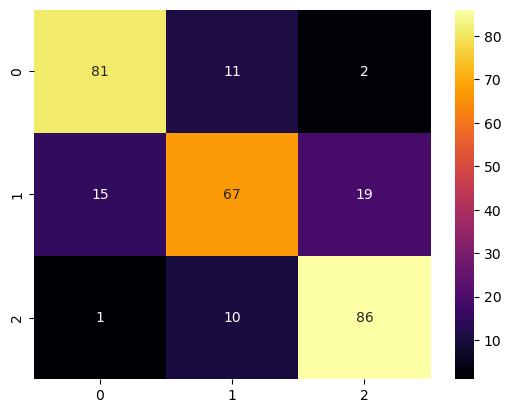

In [18]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="inferno")

# Modelo 2

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [41]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Cambio para clasificación multiclase
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [42]:


model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5297 - loss: 1.3156 - val_accuracy: 0.7051 - val_loss: 0.8896
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7788 - loss: 0.5758 - val_accuracy: 0.5983 - val_loss: 0.8885
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8131 - loss: 0.4447 - val_accuracy: 0.5769 - val_loss: 0.8945
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8493 - loss: 0.3613 - val_accuracy: 0.5940 - val_loss: 0.8599
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9008 - loss: 0.2579 - val_accuracy: 0.5897 - val_loss: 0.8451
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9085 - loss: 0.2451 - val_accuracy: 0.5855 - val_loss: 0.8545
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9193 - loss: 0.2139 - val_accuracy: 0.6026 - val_loss: 0.8415
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9304 - loss: 0.1804 - val_accuracy: 0.6026 - val_loss:

Epoch 52/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9897 - loss: 0.0245 - val_accuracy: 0.7607 - val_loss: 0.9286
Epoch 53/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.7778 - val_loss: 0.9078
Epoch 54/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9866 - loss: 0.0414 - val_accuracy: 0.7735 - val_loss: 0.8738
Epoch 55/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9911 - loss: 0.0419 - val_accuracy: 0.7821 - val_loss: 0.9125
Epoch 56/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9881 - loss: 0.0296 - val_accuracy: 0.7650 - val_loss: 0.8908
Epoch 57/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9841 - loss: 0.0453 - val_accuracy: 0.7778 - val_loss: 0.8455
Epoch 58/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9895 - loss: 0.0292 - val_accuracy: 0.7863 - val_loss: 0.9243
Epoch 59/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9902 - loss: 0.0207 - val_accuracy: 0.7650 - v

Epoch 103/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9950 - loss: 0.0093 - val_accuracy: 0.7778 - val_loss: 1.0550
Epoch 104/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9943 - loss: 0.0160 - val_accuracy: 0.7821 - val_loss: 1.0874
Epoch 105/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.7949 - val_loss: 1.0865
Epoch 106/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.7821 - val_loss: 1.0868
Epoch 107/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9990 - loss: 0.0068 - val_accuracy: 0.7778 - val_loss: 1.1113
Epoch 108/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9936 - loss: 0.0159 - val_accuracy: 0.7735 - val_loss: 1.1689
Epoch 109/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9931 - loss: 0.0148 - val_accuracy: 0.7735 - val_loss: 1.2017
Epoch 110/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9937 - loss: 0.0157 - val_accuracy: 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9953 - loss: 0.0128 - val_accuracy: 0.7564 - val_loss: 1.3805
Epoch 154/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.7393 - val_loss: 1.5174
Epoch 155/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.7350 - val_loss: 1.5251
Epoch 156/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9882 - loss: 0.0269 - val_accuracy: 0.7650 - val_loss: 1.5515
Epoch 157/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9960 - loss: 0.0145 - val_accuracy: 0.7778 - val_loss: 1.5127
Epoch 158/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9998 - loss: 0.0048 - val_accuracy: 0.7863 - val_loss: 1.4102
Epoch 159/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - loss: 0.0080 - val_accuracy: 0.7650 - val_loss: 1.3425
Epoch 160/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9934 - loss: 0.0149 - val_accuracy: 0.7692 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9956 - loss: 0.0156 - val_accuracy: 0.7521 - val_loss: 1.2303
Epoch 204/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9984 - loss: 0.0044 - val_accuracy: 0.7393 - val_loss: 1.2384
Epoch 205/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9983 - loss: 0.0089 - val_accuracy: 0.7479 - val_loss: 1.2232
Epoch 206/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.7564 - val_loss: 1.2040
Epoch 207/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.7479 - val_loss: 1.2058
Epoch 208/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.7564 - val_loss: 1.2090
Epoch 209/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9966 - loss: 0.0076 - val_accuracy: 0.7692 - val_loss: 1.2891
Epoch 210/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9963 - loss: 0.0094 - val_accuracy: 0.7650 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9904 - loss: 0.0271 - val_accuracy: 0.7692 - val_loss: 1.6956
Epoch 254/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9878 - loss: 0.0349 - val_accuracy: 0.7906 - val_loss: 1.5322
Epoch 255/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9925 - loss: 0.0286 - val_accuracy: 0.7521 - val_loss: 1.6261
Epoch 256/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.7308 - val_loss: 1.6348
Epoch 257/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9972 - loss: 0.0104 - val_accuracy: 0.7607 - val_loss: 1.5120
Epoch 258/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9960 - loss: 0.0187 - val_accuracy: 0.7949 - val_loss: 1.5122
Epoch 259/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.7821 - val_loss: 1.5515
Epoch 260/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9905 - loss: 0.0242 - val_accuracy: 0.7821 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.7778 - val_loss: 1.4904
Epoch 304/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.7650 - val_loss: 1.5030
Epoch 305/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.7650 - val_loss: 1.5766
Epoch 306/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.7692 - val_loss: 1.6497
Epoch 307/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.7692 - val_loss: 1.6999
Epoch 308/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9972 - loss: 0.0082 - val_accuracy: 0.7650 - val_loss: 1.7018
Epoch 309/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.7436 - val_loss: 1.7148
Epoch 310/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9968 - loss: 0.0077 - val_accuracy: 0.7521 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.7863 - val_loss: 1.7223
Epoch 354/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9966 - loss: 0.0128 - val_accuracy: 0.7607 - val_loss: 1.7426
Epoch 355/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9963 - loss: 0.0082 - val_accuracy: 0.7821 - val_loss: 1.7267
Epoch 356/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9963 - loss: 0.0143 - val_accuracy: 0.7479 - val_loss: 1.8375
Epoch 357/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9928 - loss: 0.0170 - val_accuracy: 0.7436 - val_loss: 1.8618
Epoch 358/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9881 - loss: 0.0286 - val_accuracy: 0.7179 - val_loss: 1.9974
Epoch 359/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9955 - loss: 0.0087 - val_accuracy: 0.7479 - val_loss: 1.8734
Epoch 360/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.7436 - val_los

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        94
           1       0.73      0.65      0.69       101
           2       0.79      0.85      0.82        97

    accuracy                           0.79       292
   macro avg       0.79      0.79      0.79       292
weighted avg       0.78      0.79      0.79       292

